In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
def bootstrap_std_dev(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.std()

def bootstrap_mean(df):
    bootstrapped = df.sample(n=len(df), replace=True) #sample with replacement
    return bootstrapped.mean()



c="all"
# df = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_good_policy")
# df_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/ope_estimates_c_in_{c}_no_outliers_bad_policy")

# df = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy")
# df_no_outliers = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_good_policy_no_outliers")
# df_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy")
# df_no_outliers_bad = pd.read_parquet(f"parquets/policy_experiments/ope_estimates_bad_policy_no_outliers")


# df = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage")
# df_no_outliers = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_good_coverage_no_outliers")
# df_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")
# df_no_outliers_bad = pd.read_parquet(f"parquets/coverage_experiments/ope_estimates_bad_coverage")

df = pd.read_parquet(f"parquets/10_concepts_experiments/ope_estimates_good_policy")
df_no_outliers = pd.read_parquet(f"parquets/10_concepts_experiments/ope_estimates_good_policy_no_outliers")
df_bad = pd.read_parquet(f"parquets/10_concepts_experiments/ope_estimates_bad_policy")
df_no_outliers_bad = pd.read_parquet(f"parquets/10_concepts_experiments/ope_estimates_bad_policy_no_outliers")

#---BOOTSTRAP SAMPLING---
df_bootstrapped_std = pd.concat([bootstrap_std_dev(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_std = pd.concat([bootstrap_std_dev(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

df_bootstrapped_mean = pd.concat([bootstrap_mean(df) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bootstrapped_mean= pd.concat([bootstrap_mean(df_no_outliers) for i in range (1000)], axis=1).T.describe()
df_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_bad) for i in range (1000)], axis=1).T.describe()
df_no_outliers_bad_bootstrapped_mean = pd.concat([bootstrap_mean(df_no_outliers_bad) for i in range (1000)], axis=1).T.describe()

on_policy = -386
on_policy_bad_coverage = -365

df_stats = df.describe()
df_no_outliers_stats = df_no_outliers.describe()
df_stats_bad = df_bad.describe()
df_no_outliers_stats_bad = df_no_outliers_bad.describe()

print(df_stats)
print(df_no_outliers_stats)
print(df_bootstrapped_std)
print(df_bootstrapped_std.loc["std"].filter(like="vanilla"))

x = np.array([100, 300, 500, 700, 900])
concepts_color = "limegreen"
concepts_color_bad = "forestgreen"
vanilla_color = "lightsalmon"
vanilla_color_bad = "saddlebrown"

pdis_label="PDIS good policy"
cpdis_label="CPDIS good policy"
pdis_label_2="PDIS bad policy"
cpdis_label_2="CPDIS bad policy"

       100_vanilla  100_concepts  300_vanilla  300_concepts  500_vanilla  \
count   200.000000    200.000000   200.000000    200.000000   200.000000   
mean   -337.328834   -329.932888  -326.193649   -315.100145  -324.758896   
std      69.408160      5.347263    49.454688     32.426262    25.659227   
min   -1288.324004   -373.927774  -721.819054   -743.131758  -551.334677   
25%    -330.286113   -329.319108  -318.732353   -312.085502  -323.089739   
50%    -329.038292   -328.668075  -313.174664   -310.584642  -317.097208   
75%    -328.606065   -328.479568  -311.110639   -310.049752  -315.695518   
max    -328.376591   -328.360129  -309.709554   -309.612378  -314.505690   

       500_concepts  700_vanilla  700_concepts  850_vanilla  850_concepts  
count    200.000000   200.000000    200.000000   200.000000    200.000000  
mean    -316.483223  -328.427321   -317.906067  -334.313524   -316.839796  
std        5.186543    32.901611      4.086520    73.323916     10.350667  
min     -36

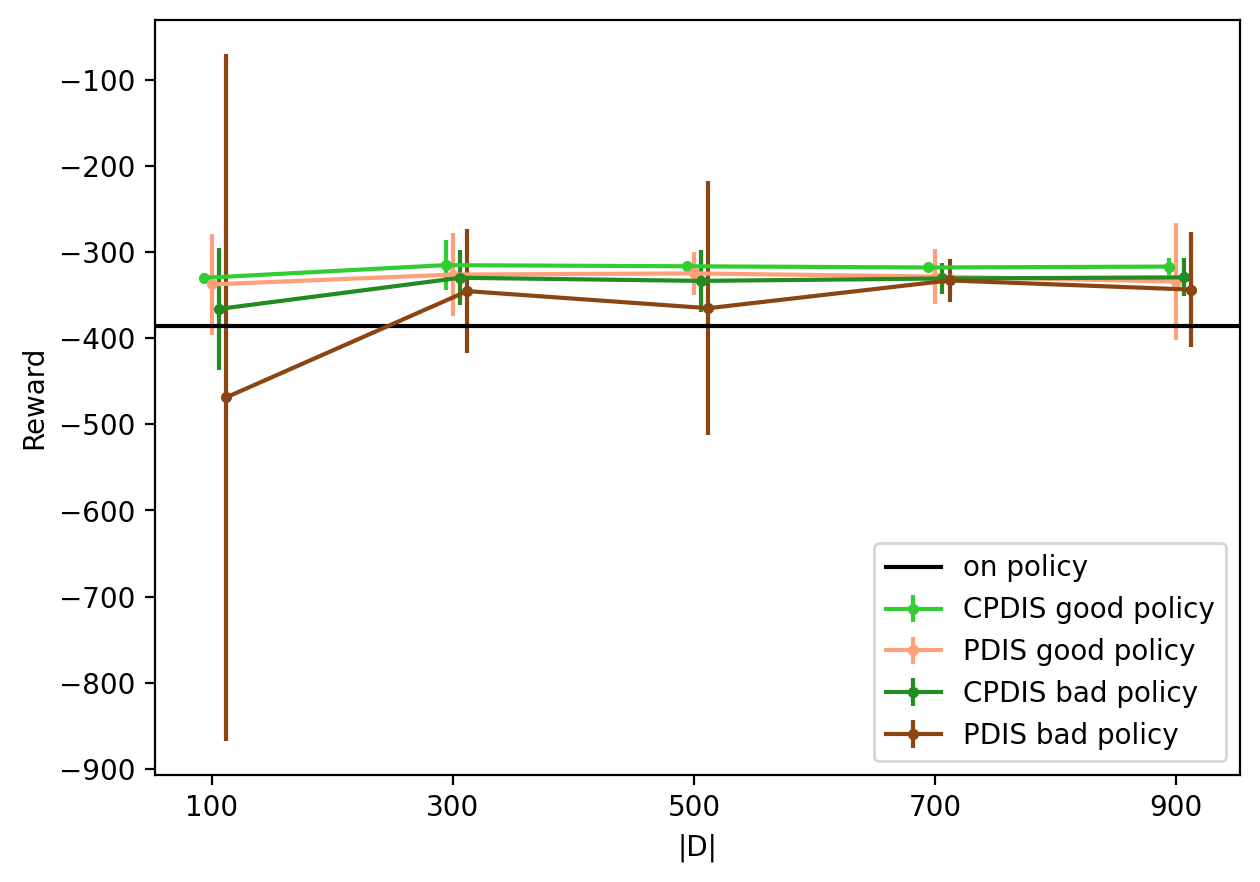

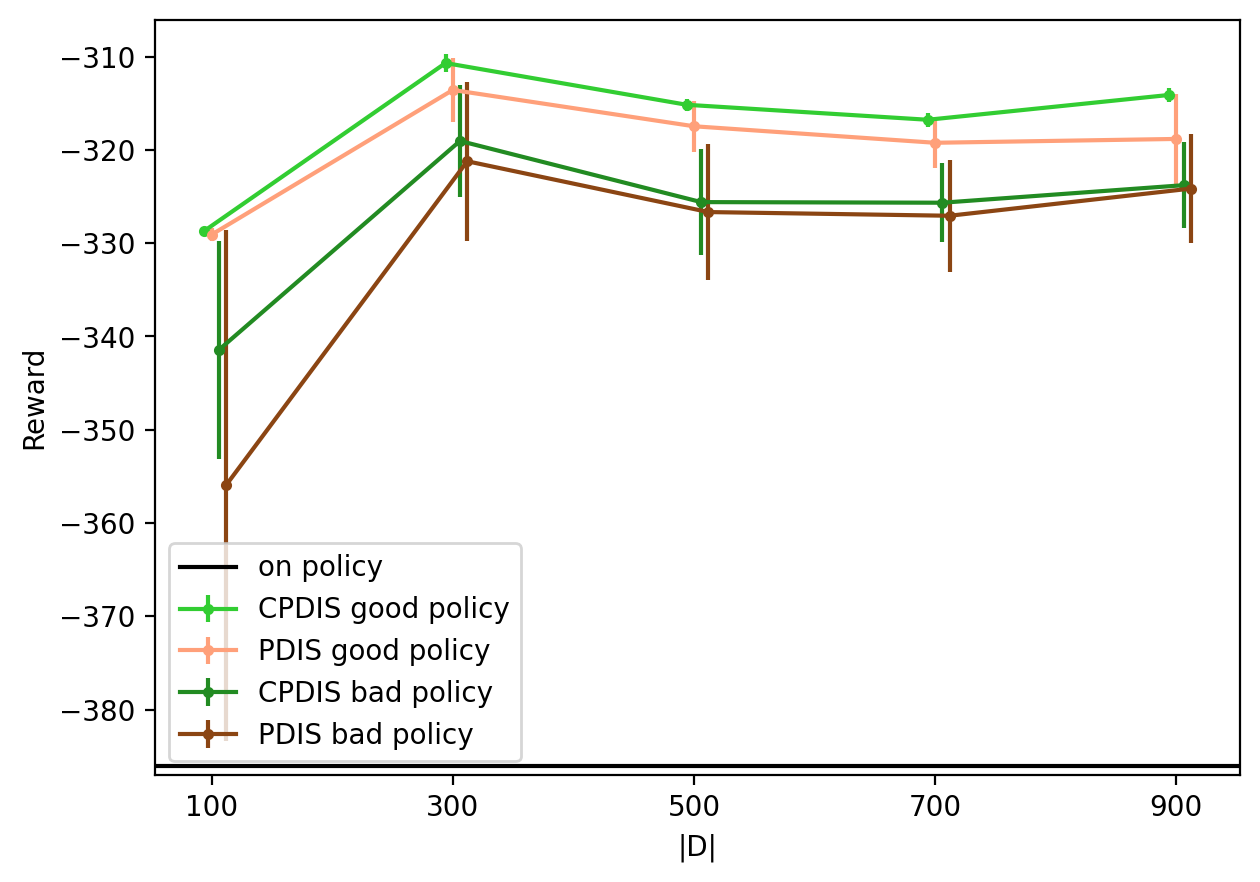

In [27]:
mean_estimates_vanilla = df_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts = df_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla = df_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts = df_bootstrapped_std.loc["mean"].filter(like="concepts")


mean_estimates_vanilla_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_bad = df_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_bad = df_bad_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers = df_no_outliers_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["mean"].filter(like="concepts")

mean_estimates_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="vanilla")
mean_estimates_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_mean.loc["mean"].filter(like="concepts")
std_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="vanilla")
std_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["mean"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x-6, mean_estimates_concepts.to_list() , yerr=std_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, mean_estimates_vanilla.to_list() , yerr=std_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x+6, mean_estimates_concepts_bad.to_list() , yerr=std_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_vanilla_bad.to_list() , yerr=std_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
# plt.axhline(on_policy_bad_coverage, label="on policy low coverage", color="grey")
plt.legend(loc="lower right")
plt.ylabel("Reward")
plt.xlabel("|D|")
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, mean_estimates_concepts_no_outliers.to_list() , yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, mean_estimates_vanilla_no_outliers.to_list() , yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x+6, mean_estimates_concepts_no_outliers_bad.to_list() , yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.errorbar(x+12, mean_estimates_vanilla_no_outliers_bad.to_list() , yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.axhline(on_policy, label="on policy", color="black")
# plt.axhline(on_policy_bad_coverage, label="on policy low coverage", color="grey")
plt.xlabel("|D|")
plt.xticks(x)


plt.ylabel("Reward")
plt.legend(loc="best")
plt.show()

## Bias Plots

100_concepts    56.088551
300_concepts    70.847226
500_concepts    69.515322
700_concepts    68.106521
850_concepts    69.135308
Name: mean, dtype: float64


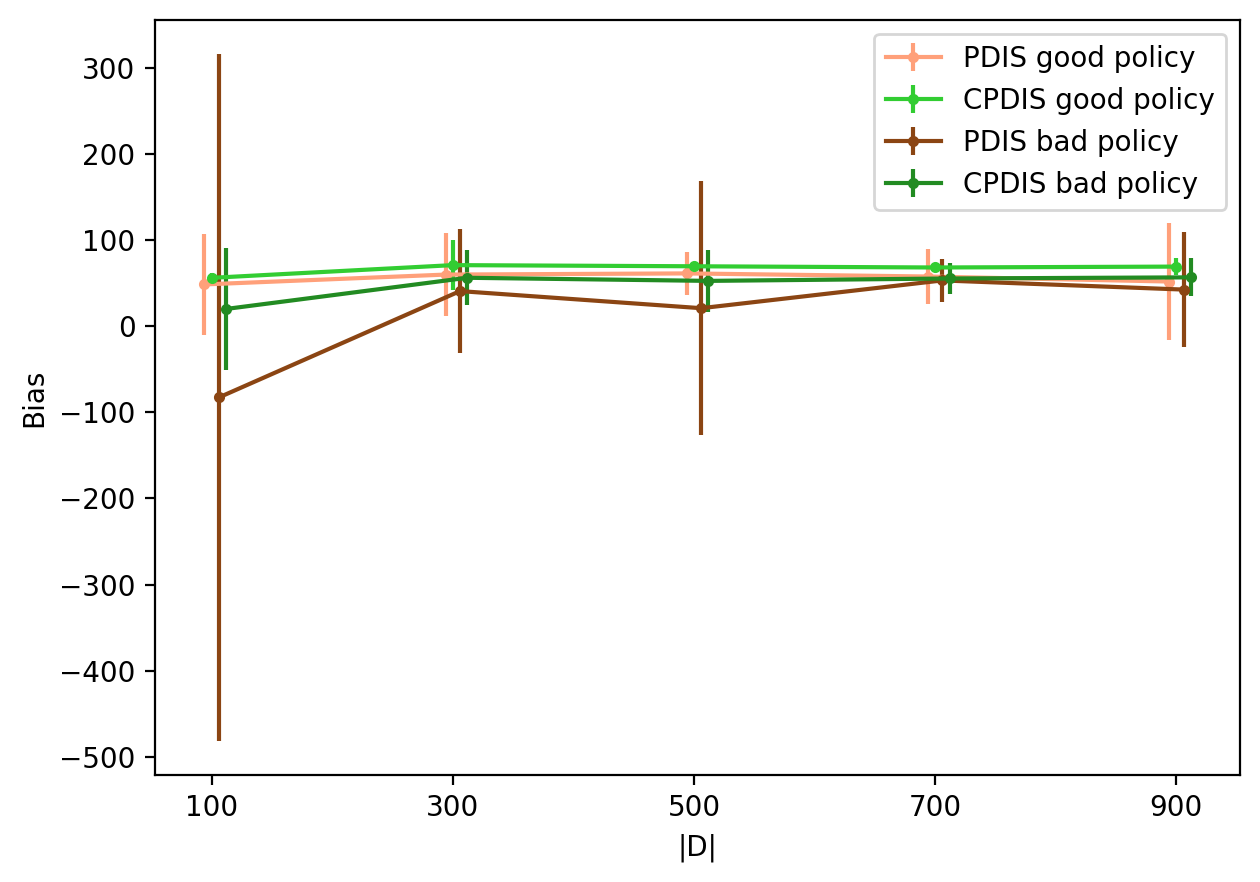

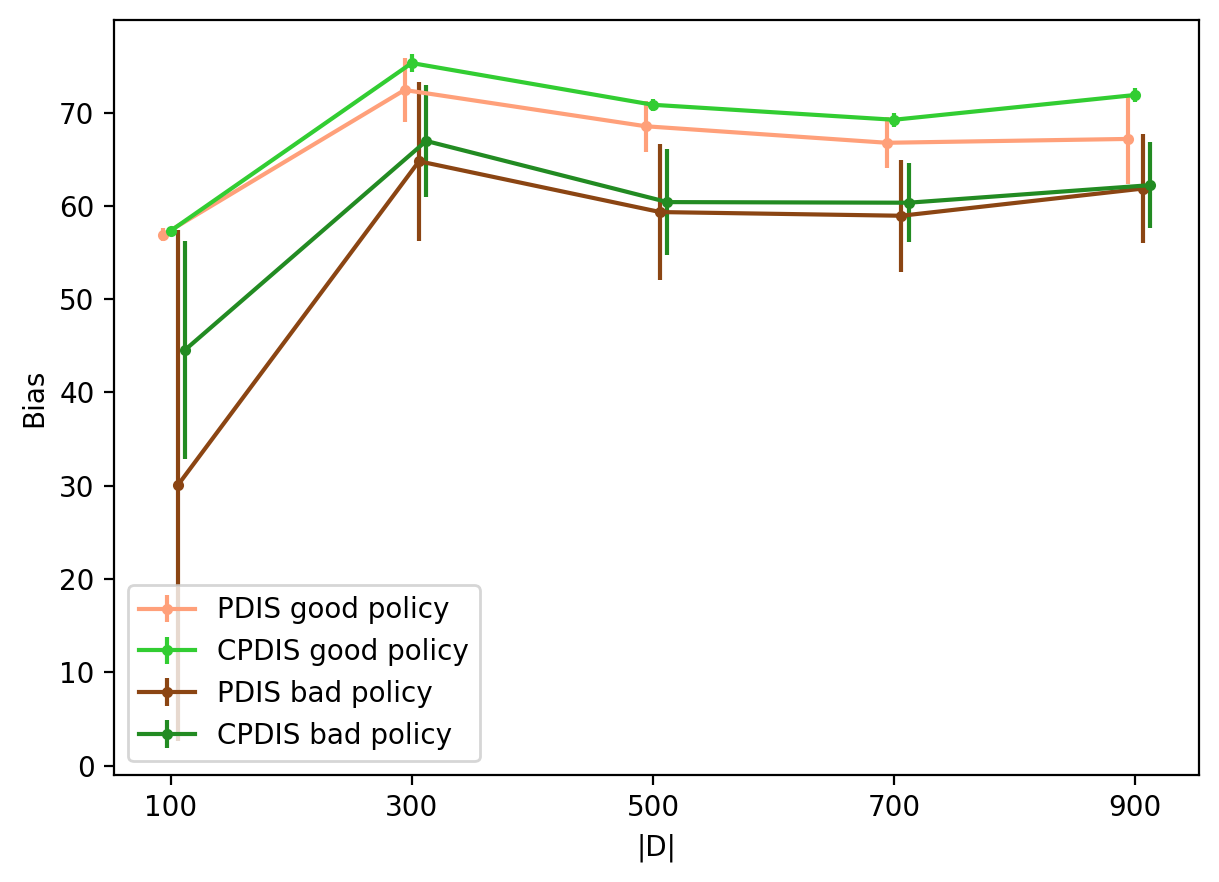

In [29]:

bias_vanilla = mean_estimates_vanilla - on_policy
bias_concepts = mean_estimates_concepts - on_policy
bias_vanilla_no_outliers = mean_estimates_vanilla_no_outliers - on_policy
bias_concepts_no_outliers = mean_estimates_concepts_no_outliers - on_policy

bias_vanilla_bad = mean_estimates_vanilla_bad - on_policy
bias_concepts_bad = mean_estimates_concepts_bad - on_policy
bias_vanilla_no_outliers_bad = mean_estimates_vanilla_no_outliers_bad - on_policy
bias_concepts_no_outliers_bad = mean_estimates_concepts_no_outliers_bad - on_policy



fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)
plt.errorbar(x-6, bias_vanilla, label=pdis_label, yerr=std_vanilla.to_list(), color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts, label=cpdis_label, yerr=std_concepts.to_list(), color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_bad, label=pdis_label_2, yerr=std_vanilla_bad.to_list(), color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_bad, label=cpdis_label_2, yerr=std_concepts_bad.to_list(), color=concepts_color_bad, marker=".")
plt.xlabel("|D|")
plt.ylabel("Bias") 
plt.xticks(x)
plt.legend()
print(bias_concepts)
fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x-6, bias_vanilla_no_outliers, yerr=std_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, bias_concepts_no_outliers, yerr=std_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x+6, bias_vanilla_no_outliers_bad, yerr=std_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad, marker=".")
plt.errorbar(x+12, bias_concepts_no_outliers_bad, yerr=std_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad, marker=".")
plt.ylabel("Bias")
plt.xlabel("|D|")
plt.xticks(x)

plt.legend()
plt.show()


## Variance Plots

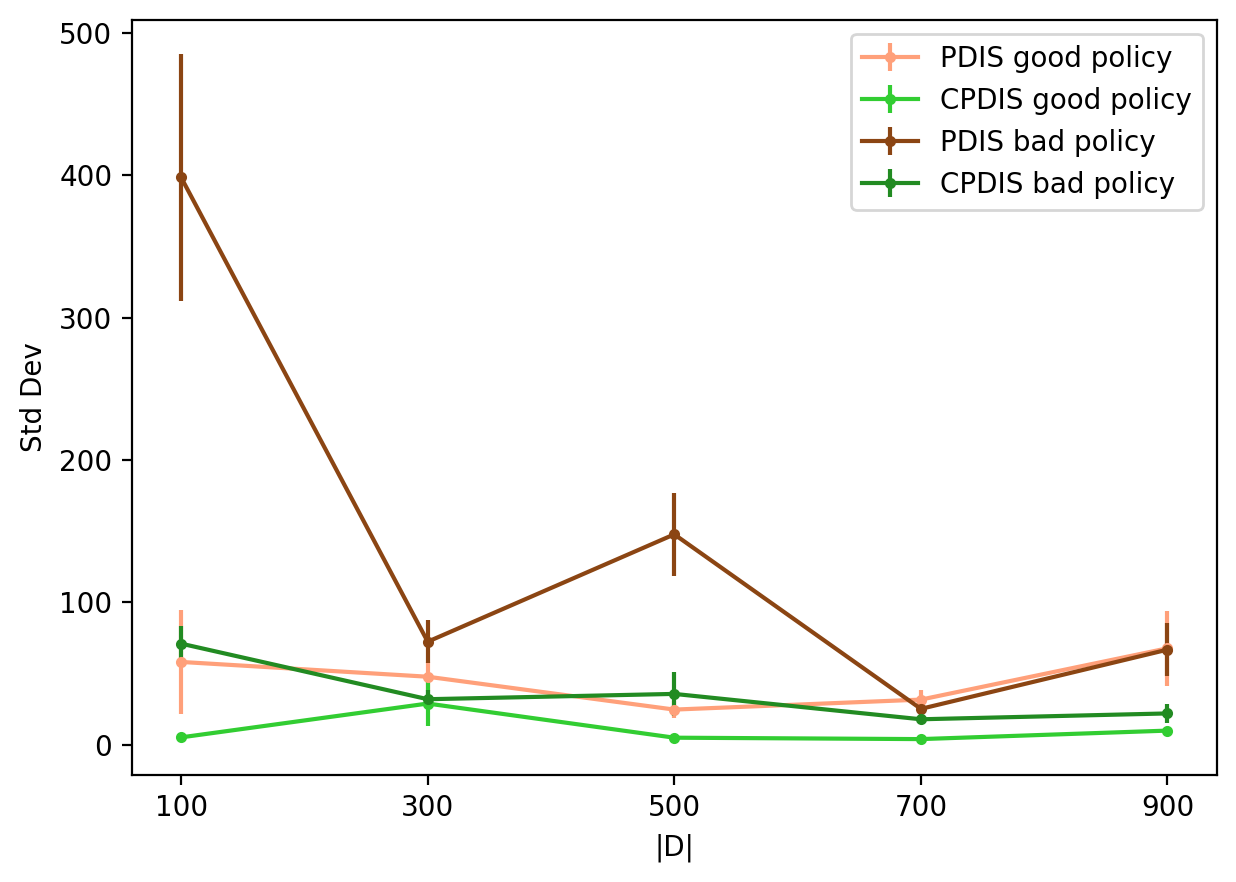

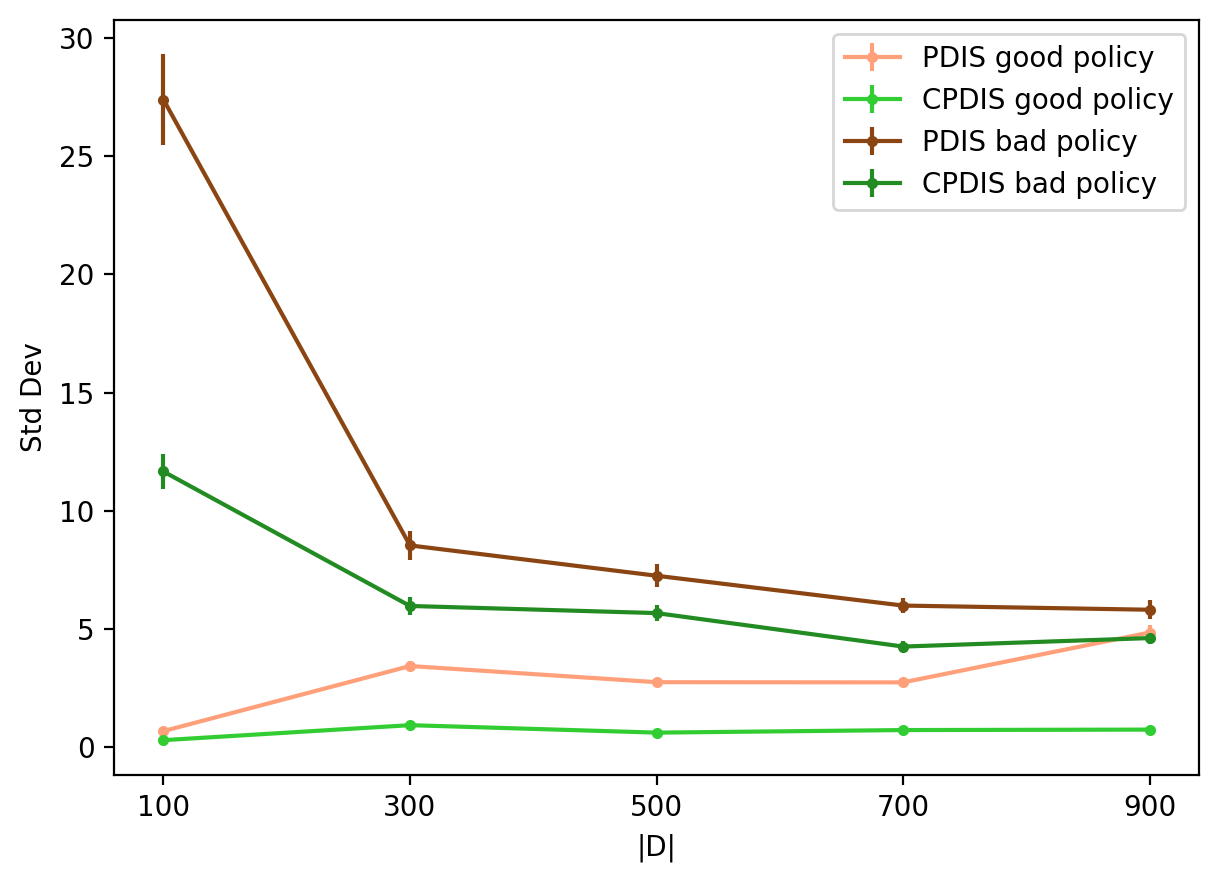

In [13]:
var_vanilla = std_vanilla**2
var_concepts = std_concepts**2
var_vanilla_no_outliers = std_vanilla_no_outliers**2
var_concepts_no_outliers = std_concepts_no_outliers**2
var_vanilla_bad = std_vanilla_bad**2
var_concepts_bad = std_concepts_bad**2
var_vanilla_no_outliers_bad = std_vanilla_no_outliers_bad**2
var_concepts_no_outliers_bad = std_concepts_no_outliers_bad**2

#Error bars of standard deviation from bootstrap sampling
err_vanilla = df_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts = df_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers = df_no_outliers_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_bad = df_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_bad = df_bad_bootstrapped_std.loc["std"].filter(like="concepts")
err_vanilla_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="vanilla")
err_concepts_no_outliers_bad = df_no_outliers_bad_bootstrapped_std.loc["std"].filter(like="concepts")


fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,1)

plt.errorbar(x, std_vanilla, yerr=err_vanilla.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts, yerr=err_concepts.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, std_vanilla_bad, yerr=err_vanilla_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_bad, yerr=err_concepts_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.legend()
plt.xticks(x)

fig = plt.figure(figsize=(7,5), dpi=200)
# plt.subplot(1,2,2)
plt.errorbar(x, std_vanilla_no_outliers, yerr=err_vanilla_no_outliers.to_list(), label=pdis_label, color=vanilla_color, marker=".")
plt.errorbar(x, std_concepts_no_outliers, yerr=err_concepts_no_outliers.to_list(), label=cpdis_label, color=concepts_color, marker=".")
plt.errorbar(x, std_vanilla_no_outliers_bad, yerr=err_vanilla_no_outliers_bad.to_list(), label=pdis_label_2, color=vanilla_color_bad,  marker=".")
plt.errorbar(x, std_concepts_no_outliers_bad, yerr=err_concepts_no_outliers_bad.to_list(), label=cpdis_label_2, color=concepts_color_bad,  marker=".")
plt.xlabel("|D|")
plt.ylabel("Std Dev")
plt.xticks(x)


plt.legend()
plt.show()


## MSE Plots

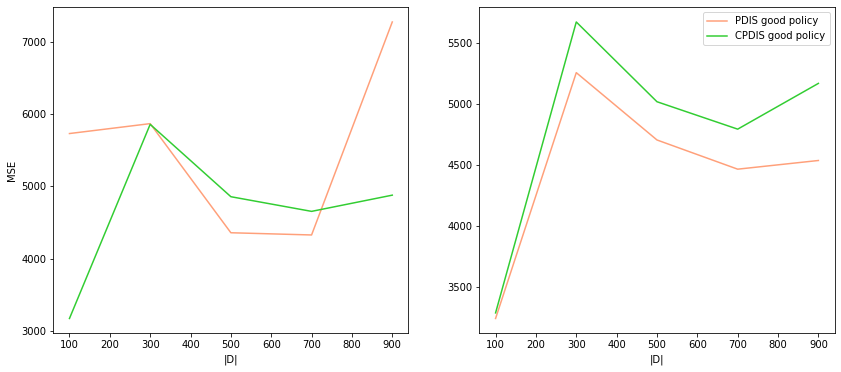

In [14]:
mse_vanilla = var_vanilla + bias_vanilla**2
mse_concepts = var_concepts + bias_concepts**2
mse_vanilla_no_outliers = var_vanilla_no_outliers + bias_vanilla_no_outliers**2
mse_concepts_no_outliers = var_concepts_no_outliers + bias_concepts_no_outliers**2

fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)

plt.plot(x, mse_vanilla, label=pdis_label, color=vanilla_color)
plt.plot(x, mse_concepts, label=cpdis_label, color=concepts_color)
plt.xlabel("|D|")
plt.ylabel("MSE")

plt.subplot(1,2,2)
plt.plot(x, mse_vanilla_no_outliers, label=pdis_label, color=vanilla_color)
plt.plot(x, mse_concepts_no_outliers, label=cpdis_label, color=concepts_color)
plt.xlabel("|D|")


plt.legend()
plt.show()